* Student name: Charles Ondieki Otwori
* Student pace: Part-time
* Scheduled project review date/time: February 12, 2025
* Instructor name: Daniel Ekale 
* Github link :https://github.com/charlesot/phase-4.git

#  Novelle Movies Recommendation  system Project Summary 

## Project overview 
 Unlike established streaming services, small businesses in Kenya that sell movies have high customer churn and dissatisfaction rates because they cannot recommend movies to their customers. The business owners have to watch all the movies to give recommendations, this not only wastes time but also  increases missed opportunities to sell movies that the vendor has never watched. 
 The Novelle Movies recommendation system project will develop a personalized movie recommendation system that will enable small business owners to improve sales and retention of their customers through improved customer experience

## Business understanding
* Small businesses in Kenya that sell movies have high customer churn and dissatisfaction rates.
* They spend a lot of time watching all the movies to give recommendations.
* They miss opportunities to sell movies that vendors have never watched.
* They have limited resources to develop a personalized movie recommendation system.
  
### Project objectives 
* Increase customer engagement by recommending movies based on user preference 
* Increase sales by supporting customers to find movies of their taste 
* Be able to make recommendations to new customers
  
### Key features of Novelle Movie recommendation system 
* Collaborative filtering (SVD) for personalized recommendations for existing active users 
* Content-based filtering  using movie genre and tags to handle new users
* Hybrid system  that combines both methods  for the best recommendation 

## Data understanding

The project will use the MovieLens small dataset from the GroupLens research lab at the University of Minnesota. It contains 100,863 ratings and 3683 tag applications on 9742 movies. It was created by 610 users between March 29, 1996, and september 24, 2018. The dataset was generated on September 26, 2018,  and is available for download at http://grouplens.org/datasets/.

#### Dataset citation 
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

### Variables
The MovieLens small dataset has the following 
* Movies.csv which contains the movie details (movieId, title, genres)
* ratings.CSV which contains user ratings (userId, movieId, rating, timestamp)
* tags.CSV contains user-generated movie tags (userId, movieId, tag, timestamp)

## Data preparation 
### Import the Python libraries to use 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, Reader, SVDpp
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.pipeline import Pipeline 

### Load the dataset  
Dataset if downloaded from http://grouplens.org/datasets/ and loaded into pandas data frames
movies_df = pd.read_csv(r'./Data\movies.csv')
tags_df = pd.read_csv(r'./Data\tags.csv')
ratings_df = pd.read_csv(r'./Data\ratings.csv')

### Exploration  
* The ratings_df, tags_df, and movies_df  data frames were explored to see the first five rows, the information, shape, missing entries, and the number of unique users and movies.
* The column timestamp dropped because it was not being used
* All tags converted to lowercase 
* All the tags per movie aggregate
* The movies_df and the tag_df merged on movieID column
* All Nan features filled with an empty string
* "genre" and "tags" combined to form one feature  a "combined_feature"
* The modified movies_df is merged with the ratings_df  to form merged_df dataframe which will be used in development of the model 
* merged_df data frame is further explored to identify the top ten rated movies, the distribution of the movie rating, the 10 most rated movies, and the distribution number of ratings per user
  
## Modelling
### Collabotarive filtering (SVD) modeling 
* Used Surprise SVD to predict user preferences: data split into training and testing with test_size of 0.2 and random _state of 42 . training of the model used n_factor of 50 
* Model evaluates using root mean square error (RMSE) and mean absolute error (MAE)
* function developed to get movie recommendations using  SVD
MAE:  0.5781
RMSE: 0.7500
### Content-based filtering 
 * The TF_IDF and cosine similarity to recommend movies based on combined features

### Hybrid recommendation 
* Hybrid recommendation system combines collaborative filtering (SVD) and content-based filtering.
    If the user has rated at least 5 movies, use collaborative filtering (SVD).
    If the user has rated less than 5 movies, use content-based filtering and recommend the top-rated movie.
    If the user has not rated any movies, recommend the top-rated movies to address the cold start problem
  
## Model improvement: Hyperparameter Tuning 
* GridSearchCV was used to improve performance but it shoed no change in performance .
Best RMSE parameters: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
Best MAE parameters: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
MAE:  0.5781
RMSE: 0.7500
* SVDpp Used ..showed minimal improvement despite using lots of computational resources 
RMSE: 0.7206
MAE:  0.5518


Importing Important python libraries 

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from surprise import SVD, Dataset, Reader, SVDpp
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.pipeline import Pipeline 


loading dataset

In [3]:
movies_df = pd.read_csv(r'./Data\movies.csv')
tags_df = pd.read_csv(r'./Data\tags.csv')
ratings_df = pd.read_csv(r'./Data\ratings.csv')

Data Exploration

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movies_df.shape

(9742, 3)

* Movies_df has 9742 columns and 3 rows . It alsk has no null values. The Columns include MovieId, title and genres. 

In [7]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [9]:
tags_df.shape

(3683, 4)

* tags_df has 3683 rows and 4 columns . It also has no null values. Columns include UserId, MovieId, tag and timestamp 

In [10]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [12]:
ratings_df.shape

(100836, 4)

In [13]:
# Movie ID to movie name mapping
movie_names = movies_df.set_index('movieId')['title'].to_dict()
n_users = len(ratings_df.userId.unique())
n_items = len(ratings_df.movieId.unique())
print('----------------------------------------------------------------')
print("Number of unique users:", n_users)
print('----------------------------------------------------------------')
print("Number of unique movies:", n_items)
print('----------------------------------------------------------------')
print("The full rating matrix will have:", n_users*n_items, 'elements.')
print('----------- ----------------------------------------------------')
print("Number of ratings:", len(ratings_df))
print('----------- ----------------------------------------------------')

----------------------------------------------------------------
Number of unique users: 610
----------------------------------------------------------------
Number of unique movies: 9724
----------------------------------------------------------------
The full rating matrix will have: 5931640 elements.
----------- ----------------------------------------------------
Number of ratings: 100836
----------- ----------------------------------------------------


In [14]:
ratings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100836.0,3.261276e+02,1.826185e+02,1.0,1.770000e+02,3.250000e+02,4.770000e+02,6.100000e+02
movieId,100836.0,1.943530e+04,3.553099e+04,1.0,1.199000e+03,2.991000e+03,8.122000e+03,1.936090e+05
rating,100836.0,3.501557e+00,1.042529e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,100836.0,1.205946e+09,2.162610e+08,828124615.0,1.019124e+09,1.186087e+09,1.435994e+09,1.537799e+09


* rating_df has 100836 rows and 4 columns.  The columns include movieId, ratings and timestamp . The number of unique users is 610, number of unique movies 9724, and number of rating 100836 

## Data preparation 

### Merging the tag data set with the movies data set


In [15]:
# dropping the timestamp which is not going to be used 
tags_df.drop(columns= ['timestamp'], inplace= True)

In [16]:
# convert tags to lowercase
tags_df['tag'] = tags_df['tag'].str.lower()

In [17]:
# Aggregate all tags per movie
movie_tags = tags_df.groupby('movieId')['tag'].apply(lambda x: " ".join (x)).reset_index()
movie_tags

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game robin williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake
...,...,...
1567,183611,comedy funny rachel mcadams
1568,184471,adventure alicia vikander video game adaptation
1569,187593,josh brolin ryan reynolds sarcasm
1570,187595,emilia clarke star wars


In [18]:
# merge all tags with movies dataset 
movies_df = movies_df.merge(movie_tags, on='movieId',how='left')
movies_df.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game robin williams game
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake


In [19]:
# fill NaN feature with empty string 
movies_df['tag'].fillna(' ', inplace = True)

In [20]:
#combining genre and tags into one feature 
movies_df['combined_feature'] = movies_df['genres'] +' '+ movies_df['tag']
movies_df.head()

,movieId,title,genres,tag,combined_feature
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun,Adventure|Animation|Children|Comedy|Fantasy pi...
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game robin williams game,Adventure|Children|Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old,Comedy|Romance moldy old
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,Comedy pregnancy remake


In [21]:
#merge rating and movies 
merged_df = ratings_df.merge(movies_df,on ='movieId', how='left')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,tag,combined_feature
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun,Adventure|Animation|Children|Comedy|Fantasy pi...
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy old,Comedy|Romance moldy old
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,,Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,mystery twist ending serial killer,Mystery|Thriller mystery twist ending serial k...
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,mindfuck suspense thriller tricky twist ending...,Crime|Mystery|Thriller mindfuck suspense thril...


In [22]:
merged_df.shape

(100836, 8)

In [23]:
#Top ten most rated movies 
top_movies = merged_df['movieId'].value_counts().head(10)
print(movies_df[movies_df['movieId'].isin(top_movies.index)])

      movieId                                      title  \
97        110                          Braveheart (1995)   
224       260  Star Wars: Episode IV - A New Hope (1977)   
257       296                        Pulp Fiction (1994)   
277       318           Shawshank Redemption, The (1994)   
314       356                        Forrest Gump (1994)   
418       480                       Jurassic Park (1993)   
461       527                    Schindler's List (1993)   
507       589          Terminator 2: Judgment Day (1991)   
510       593           Silence of the Lambs, The (1991)   
1939     2571                         Matrix, The (1999)   

                                genres  \
97                    Action|Drama|War   
224            Action|Adventure|Sci-Fi   
257        Comedy|Crime|Drama|Thriller   
277                        Crime|Drama   
314           Comedy|Drama|Romance|War   
418   Action|Adventure|Sci-Fi|Thriller   
461                          Drama|War   
507

Distribution of ratings

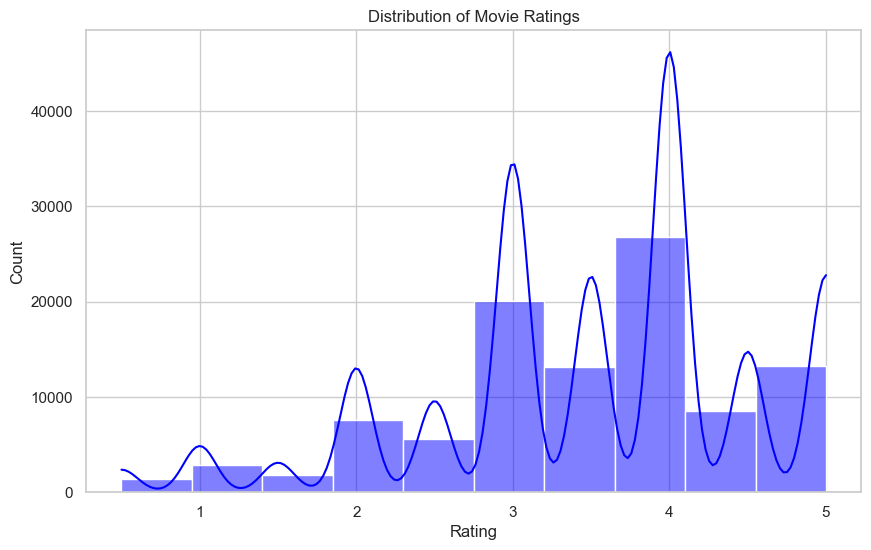

In [24]:
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df["rating"], bins=10, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

* The rating distribution is not normally distributed , most of the movies are rated 3 and 4.

C:\Users\ondie\AppData\Local\Temp\ipykernel_28960\2097743499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies_df['title'], x=top_movies_df['count'], palette='viridis')


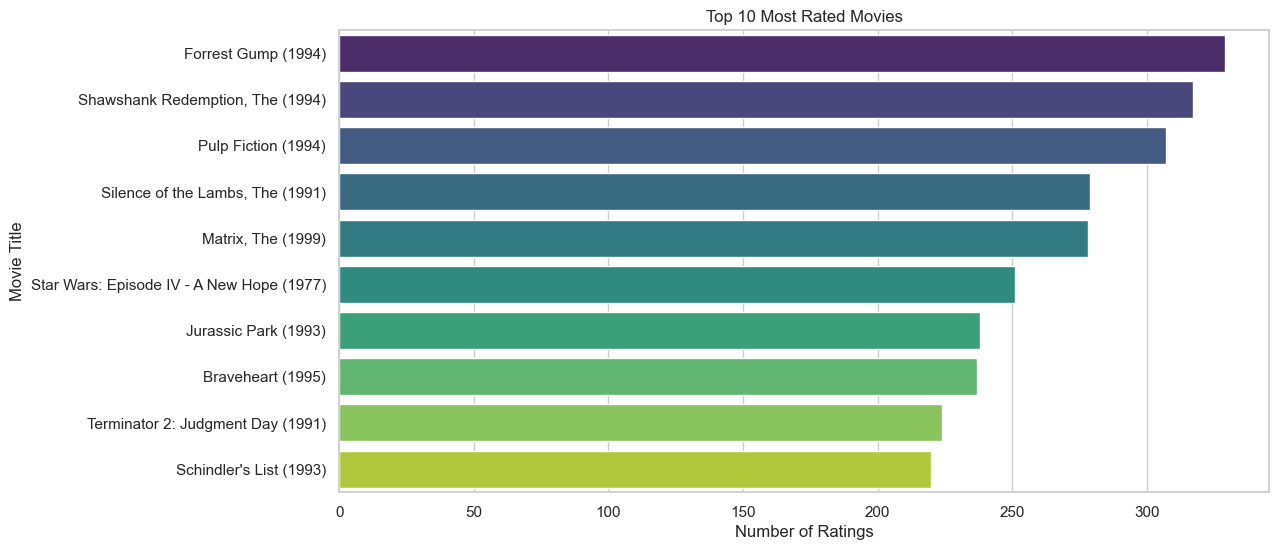

In [25]:
#Top 10 most rated movies (Bar Chart)
top_movies_df = merged_df['movieId'].value_counts().head(10).reset_index()
top_movies_df.columns = ['movieId', 'count']
top_movies_df = top_movies_df.merge(movies_df[['movieId', 'title']], on='movieId')

plt.figure(figsize=(12, 6))
sns.barplot(y=top_movies_df['title'], x=top_movies_df['count'], palette='viridis')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Rated Movies')
plt.show()



* The above chart shows the top 10 most rated movies in the dataset , the top three being forest gump, Shawshank Redemption and Pulp Fiction 

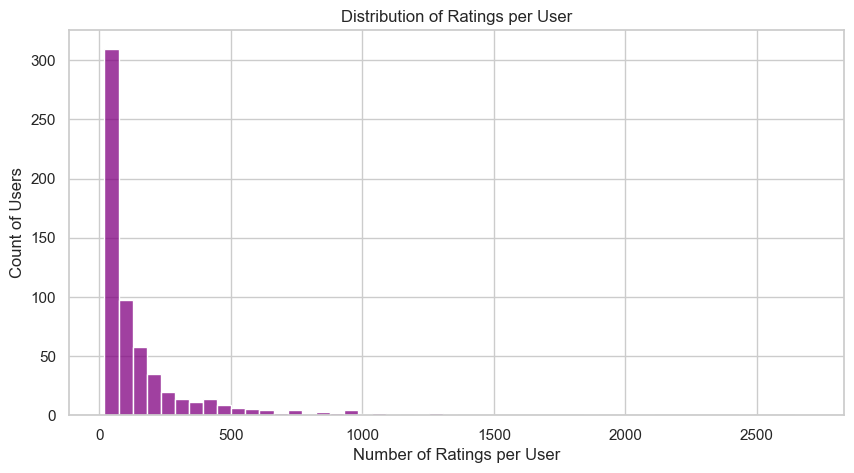

In [26]:
# Number of Ratings per User
plt.figure(figsize=(10, 5))
sns.histplot(ratings_df['userId'].value_counts(), bins=50, color='purple')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count of Users')
plt.title('Distribution of Ratings per User')
plt.show()


* The chart shows that some users made a lot of rating over 500 which is an outlier hence could have skewed the data 

## Modelling 

###  Collaborative filtering (SVD) Modelling
Using Surprise SVD to predict user preference

In [27]:
#Define rating scale 
reader = Reader(rating_scale= (0.5, 5.0))

In [28]:
# load dataset into surprise 
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']],reader)

In [29]:
# splitting data into training and testing 
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [30]:
# Training the model 
svd_model = SVD(n_factors =50,biased=True,random_state=42)
svd_model.fit(trainset)

In [31]:
#evaluate model
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8734  0.8735  0.8725  0.8695  0.8701  0.8718  0.0017  
MAE (testset)     0.6706  0.6697  0.6722  0.6671  0.6687  0.6696  0.0017  
Fit time          4.09    3.81    4.20    4.28    3.72    4.02    0.22    
Test time         0.14    0.21    0.25    0.19    0.26    0.21    0.04    


{'test_rmse': array([0.87341519, 0.87351045, 0.87253639, 0.8695487 , 0.87014758]),
 'test_mae': array([0.6705536 , 0.66966496, 0.67217526, 0.66711141, 0.66868581]),
 'fit_time': (4.094316005706787,
  3.8148553371429443,
  4.204718351364136,
  4.278996467590332,
  3.7208986282348633),
 'test_time': (0.14482641220092773,
  0.21235418319702148,
  0.2457277774810791,
  0.18819522857666016,
  0.2647862434387207)}

In [32]:
# model accuracy
predictions = svd_model.test(testset)
print('----------------------------------------------------------------')
mae = accuracy.mae(predictions)
rmse = accuracy.rmse(predictions)
print('----------------------------------------------------------------')

----------------------------------------------------------------
MAE:  0.5808
RMSE: 0.7552
----------------------------------------------------------------


Interpretation of model accuracy 
* The mean absolute error of 0.5781  indicate dthat on overage the predicted ratings deviates from the actual rating by 0.58 which is significant 
* The root mean squared error of 0.75 indicates that some oredictions devialte significantly 
* lower value so both RMSE and MAE indicate btter model performance 

Predict movie ratings 

In [33]:
# Function to get movie recommendations using SVD
def get_svd_recommendations(user_id, svd_model, movies_df, ratings_df, top_n=5):
    rated_movies = ratings_df[ratings_df["userId"] == user_id]["movieId"].tolist()

    predictions = []
    for movie_id in movies_df["movieId"].unique():
        if movie_id not in rated_movies:
            pred = svd_model.predict(user_id, movie_id)
            predictions.append((movie_id, pred.est))

    # Sort by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)
    recommended_movies = movies_df[movies_df["movieId"].isin([m[0] for m in predictions[:top_n]])]
    
    return recommended_movies

VIsualization of model Accuracy 

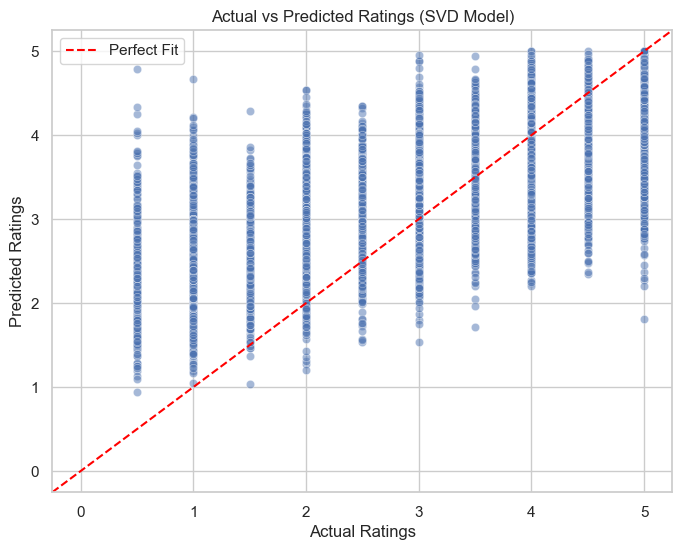

In [34]:
#Extract actual vs. predicted ratings for visualization
actual_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]

# Create a scatter plot of actual vs predicted ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=actual_ratings, y=predicted_ratings, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (SVD Model)")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label="Perfect Fit")
plt.legend()
plt.show()


* The graph shows that the model has high predicted ratings for low rated movies and high rated movies have low predictied ratings. 

### content based filtering 
Using TF-IDF and cosine similarity to recommend movies based on combined features 

In [35]:
# using TF-IDF to combined features
content_pipeline= Pipeline([
    ('tdidf',  TfidfVectorizer(stop_words= 'english'))])
tfidf_matrix = content_pipeline.fit_transform(movies_df["combined_feature"])
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [36]:
# Function to get content-based recommendations
def get_content_based_recommendations(movie_id, movies_df, tfidf_matrix, top_n=5):
    movie_index = movies_df.index[movies_df["movieId"] == movie_id].tolist()[0]
    cosine_similarities = linear_kernel(tfidf_matrix[movie_index], tfidf_matrix).flatten()

    # Get top N similar movies
    similar_indices = cosine_similarities.argsort()[-(top_n+1):-1][::-1]
    recommended_movies = movies_df.iloc[similar_indices]
    
    return recommended_movies

In [37]:
#Get recommendations for a specific user using SVD
specific_user_id = 1  # Change this value as needed
svd_recommendations = get_svd_recommendations(specific_user_id, svd_model, movies_df, ratings_df)

print(f"SVD-based recommendations for User {specific_user_id}:")
print(svd_recommendations[['title']])

# Get a content-based recommendation for a specific user
user_top_movie_id = ratings_df[ratings_df['userId'] == specific_user_id].sort_values(by='rating', ascending=False).iloc[0]['movieId']
content_recommendations = get_content_based_recommendations(user_top_movie_id, movies_df, tfidf_matrix)

print(f"Content-based recommendations for User {specific_user_id} based on their top-rated movie:")
print(content_recommendations[['title']])


SVD-based recommendations for User 1:
                                                 title
98                                  Taxi Driver (1976)
277                   Shawshank Redemption, The (1994)
596         Ghost in the Shell (Kôkaku kidôtai) (1995)
602  Dr. Strangelove or: How I Learned to Stop Worr...
613                               Trainspotting (1996)
Content-based recommendations for User 1 based on their top-rated movie:
                                           title
7344                               Baarìa (2009)
554                           Underground (1995)
5453  Carabineers, The (Carabiniers, Les) (1963)
726                    To Be or Not to Be (1942)
9553                          War Machine (2017)


### Hybrid recommendation 

In [38]:
"""
    Hybrid recommendation system combines collaborative filtering (SVD) and content-based filtering.
    If user has rated at least 5 movies, use collaborative filtering (SVD).
    If user has rated less than 5 movies, use content-based filtering and recommend the top-rated movie.
    If user has not rated any movies, recommend the top-rated movies to address cold start problem
"""
def hybrid_recommendation(user_id, svd_model, movies_df, ratings_df, tfidf_matrix, top_n=5):   
    user_rated_movies = ratings_df[ratings_df["userId"] == user_id]

    if len(user_rated_movies) >= 5:
        recommended_movies = get_svd_recommendations(user_id, svd_model, movies_df, ratings_df, top_n)
        recommendation_type = "Collaborative Filtering (SVD)"
    elif 0 < len(user_rated_movies) < 5:
        top_movie = user_rated_movies.sort_values(by="rating", ascending=False).iloc[0]["movieId"]
        recommended_movies = get_content_based_recommendations(top_movie, movies_df, tfidf_matrix, top_n)
        recommendation_type = "Tags-Enhanced Content-Based Filtering"
    else:
        top_movies = ratings_df.groupby("movieId")["rating"].mean().sort_values(ascending=False).head(top_n).index
        recommended_movies = movies_df[movies_df["movieId"].isin(top_movies)]
        recommendation_type = "Popular Movies for Cold-Start Users"

    return recommended_movies, recommendation_type


### Model improvement with hyperparameter Tuning 

In [39]:
from surprise.model_selection import GridSearchCV

def tune_svd_hyperparameters(data):
    param_grid = {
        'n_factors': [50, 100, 150],
        'n_epochs': [20, 30],
        'lr_all': [0.002, 0.005],
        'reg_all': [0.02, 0.1]
    }
    
    gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
    gs.fit(data)
    
    print('----------------------------------------------------------------')
    print("Best RMSE parameters:", gs.best_params['rmse'])
    print("Best MAE parameters:", gs.best_params['mae'])
    print('----------------------------------------------------------------')
    return gs.best_estimator['rmse']

# Run hyperparameter tuning
tuned_model = tune_svd_hyperparameters(data)
tuned_model.fit(trainset)
# Evaluate tuned model
predictions_tuned = tuned_model.test(testset)
print('----------------------------------------------------------------')
mae = accuracy.mae(predictions_tuned)
rmse = accuracy.rmse(predictions_tuned)
print('----------------------------------------------------------------')

----------------------------------------------------------------
Best RMSE parameters: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
Best MAE parameters: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
----------------------------------------------------------------
----------------------------------------------------------------
MAE:  0.6703
RMSE: 0.8722
----------------------------------------------------------------


In [40]:
# Evaluate tuned model
predictions_tuned = tuned_model.test(testset)
print('----------------------------------------------------------------')
mae = accuracy.mae(predictions_tuned)
rmse = accuracy.rmse(predictions_tuned)
print('----------------------------------------------------------------')

----------------------------------------------------------------
MAE:  0.6703
RMSE: 0.8722
----------------------------------------------------------------


### SVDPP used to improve performance 

In [ ]:
# Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD++ model
svdpp_model = SVDpp()
svdpp_model.fit(trainset)

# Evaluate SVD++ model
print('----------------------------------------------------------------')
cross_validate(svdpp_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print('----------------------------------------------------------------')

# Calculate RMSE and MAE on test set for SVD++
predictions_svdpp = svdpp_model.test(testset)
print('----------------------------------------------------------------')
rmse= accuracy.rmse(predictions_svdpp)
mae= accuracy.mae(predictions_svdpp)
print('----------------------------------------------------------------')

### Recommendations and Next steps 

* Consider a Hybrid recommendation system that combines collaborative filtering (SVD) and content-based filtering.
* If the user has rated at least 5 movies, use collaborative filtering (SVD).
* If the user has rated less than 5 movies, use content-based filtering and recommend the top-rated movie.
* If the user has not rated any movies, recommend the top-rated movies to address cold start problem

* SVDpp had slightly better performance and needs to be explored further used to improve performance
RMSE: 0.7194
MAE: 0.5506

* Use the large MovieLens dataset for modeling
* Deploy the updated model for ease of use
* Connect the updated model to customer accounts